<a href="https://colab.research.google.com/github/KayWolde/Machine-Learning/blob/main/AI_1_Kidist_Wolde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CellDNA (1).csv'
df = pd.read_csv(file_path)
df.head()

,222,31.18918919,40.34234234,35.57908668,8.883916969,0.968324558,-80.11367302,222.1,1,16.81247093,0.816176471,0.578125,78.591,0
0,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
1,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
2,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
3,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7
4,233,91.407725,279.622318,40.039467,9.256891,0.972908,80.280623,233,1,17.223960,0.732704,0.524775,88.623,0


In [9]:
X, Raw_Y = np.split(df, [-1], axis=1)    # split data into X and Y
Y = np.where(Raw_Y > 0, 1, 0)

print(X.shape, Y.shape)
print(X.ndim, Y.ndim)

(1216, 13) (1216, 1)
2 2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
X = scaler.fit_transform(X)

In [12]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [13]:
CAT_Y_train = to_categorical(Y_train,2)
CAT_Y_test = to_categorical(Y_test,2)

print(CAT_Y_train.ndim, CAT_Y_train.ndim)
print(CAT_Y_test.ndim, CAT_Y_test.ndim)

2 2
2 2


In [14]:
model = Sequential()

model.add(Dense(9, input_dim=13, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2,activation='softmax'))

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248 (992.00 B)

 Trainable params: 248 (992.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
from tensorflow.keras.optimizers import SGD
sgdm = SGD(momentum = 0.0)  # 0.9 or 0.0
Compiled = model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'] )
# Fit the model
history = model.fit(X_train, CAT_Y_train, epochs=20,batch_size=20,verbose=1, validation_data=(X_test, CAT_Y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8373 - loss: 0.6577 - val_accuracy: 0.8443 - val_loss: 0.6050
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8208 - loss: 0.5830 - val_accuracy: 0.8443 - val_loss: 0.4894
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4469 - val_accuracy: 0.8443 - val_loss: 0.3725
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8251 - loss: 0.3507 - val_accuracy: 0.8443 - val_loss: 0.3280
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.2880 - val_accuracy: 0.8443 - val_loss: 0.3145
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8343 - loss: 0.2591 - val_accuracy: 0.8443 - val_loss: 0.3053
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.2636 - val_accuracy: 0.8443 - val_loss: 0.2987
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8343 - loss: 0.2559 - val_accuracy: 0.8443 - val_loss:

In [16]:
Y_score_train = model.predict(X_train, verbose=0)
Y_hat_train = np.argmax(Y_score_train, axis=-1)
print("Confusion matrix (Training Data): \n \n", confusion_matrix(Y_train, Y_hat_train))


Y_score_test = model.predict(X_test, verbose=0)
Y_hat_test = np.argmax(Y_score_test, axis=-1)   # or... Y_hat_test = (Y_score_test > 0.5)
print("Confusion matrix (Testing Data): \n \n", confusion_matrix(Y_test, Y_hat_test))

Confusion matrix (Training Data): 
 
 [[779  31]
 [ 44 118]]
Confusion matrix (Testing Data): 
 
 [[198   8]
 [ 13  25]]


In [17]:
print(Y_score_test)

[[9.99999106e-01 7.81225708e-07]
 [4.37962949e-01 5.62036932e-01]
 [9.59805548e-01 4.01944891e-02]
 [9.73356128e-01 2.66436972e-02]
 [9.96626437e-01 3.37348296e-03]
 [9.99999702e-01 1.85273862e-07]
 [9.99999940e-01 4.74201841e-12]
 [8.73233914e-01 1.26766145e-01]
 [9.99891937e-01 1.07947184e-04]
 [9.99999940e-01 3.26341482e-10]
 [7.19195664e-01 2.80804396e-01]
 [8.49321544e-01 1.50678426e-01]
 [9.99996364e-01 3.53357450e-06]
 [9.99091744e-01 9.08204936e-04]
 [4.37962949e-01 5.62036932e-01]
 [9.99999821e-01 1.66693638e-07]
 [9.99999940e-01 2.36239064e-08]
 [9.99999940e-01 1.55912283e-09]
 [9.99947965e-01 5.19764471e-05]
 [9.99992073e-01 7.89047408e-06]
 [9.99658108e-01 3.41939740e-04]
 [9.31217849e-01 6.87822625e-02]
 [5.51336169e-01 4.48663771e-01]
 [9.82339561e-01 1.76604893e-02]
 [9.99999106e-01 8.12400401e-07]
 [6.90868914e-01 3.09131056e-01]
 [9.99999940e-01 2.29686575e-10]
 [9.99999821e-01 9.33761015e-08]
 [9.99997556e-01 2.32866068e-06]
 [9.99999940e-01 2.73118372e-09]
 [9.704366

In [18]:
from sklearn.metrics import accuracy_score
print("Model accuracy score is ", accuracy_score(Y_test, Y_hat_test))

Model accuracy score is  0.9139344262295082


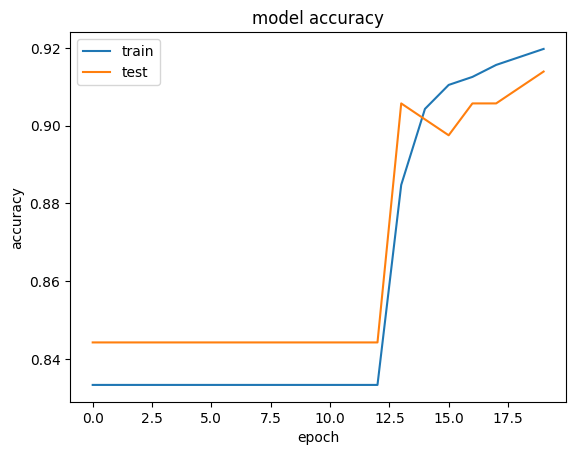

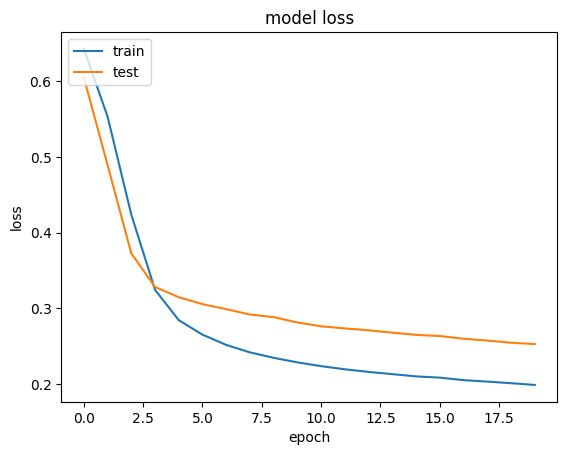

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()